In [1]:
import numpy as np



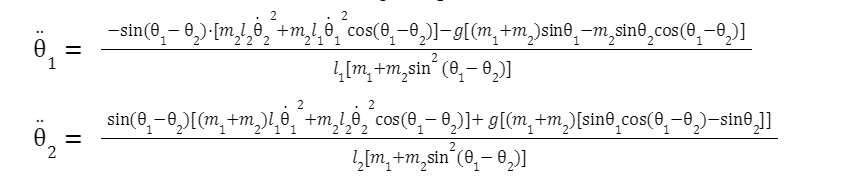

In [7]:
class System:
    def __init__(self,
        m1:float=1,
        m2:float=1,
        l1:float=1,
        l2:float=1,
        theta_1_initial:float=0,
        theta_2_initial:float=0,
        theta_1_dot_initial:float=0.05,
        theta_2_dot_initial:float=0.1,
        theta_1_dot_dot_initial:float=np.nan,
        theta_2_dot_dot_initial:float=np.nan,
        step:float=0.1):
        self.m1 = m1
        self.m2 = m2
        self.l1 = l1
        self.l2 = l2
        self.theta_1_initial = theta_1_initial
        self.theta_2_initial = theta_2_initial
        self.theta_1_dot_initial = theta_1_dot_initial
        self.theta_2_dot_initial = theta_2_dot_initial
        self.theta_1_dot_dot_initial = theta_1_dot_dot_initial
        self.theta_2_dot_dot_initial = theta_2_dot_dot_initial
        self.step = step
        self.g = 9.8
        self.reset()
    
    def reset(self):
        self.current_step = 0
        self.state_memory = [[self.theta_1_initial, self.theta_1_dot_initial, self.theta_1_dot_dot_initial, 
                              self.theta_2_initial, self.theta_2_dot_initial, self.theta_2_dot_dot_initial]]
        
    
    def theta_1_dot_dot(self, theta_1, theta_1_dot,theta_2,theta_2_dot):
        num = (-np.sin(theta_1-theta_2)*(self.m2*self.l2*(theta_2_dot**2) 
                +self.m2*self.l1*(theta_1_dot**2)*np.cos(theta_1-theta_2)) 
            -self.g*((self.m1 +self.m2)*np.sin(theta_1) - self.m2*(np.sin(theta_2)*np.cos(theta_1-theta_2))))
        den = self.l1*(self.m1+self.m2*((np.sin(theta_1-theta_2))**2))
        return num/den
    
    def theta_2_dot_dot(self, theta_1, theta_1_dot,theta_2,theta_2_dot):
        num = (np.sin(theta_1-theta_2)*((self.m1+self.m2)*self.l1*(theta_1_dot**2) 
                +self.m2*self.l2*(theta_2_dot**2)*np.cos(theta_1-theta_2)) 
            +self.g*((self.m1 +self.m2)*(np.sin(theta_1)*np.cos(theta_1-theta_2)-np.sin(theta_2))))
        den = self.l2*(self.m1+self.m2*((np.sin(theta_1-theta_2))**2))
        return num/den
    
    def get_current_state(self):
        current_state = self.state_memory[self.current_step]
        state = {
            'theta_1': current_state[0],
            'theta_1_dot': current_state[1],
            'theta_2': current_state[3],
            'theta_2_dot': current_state[4]
        }
        return state
        
    def insert_state(self, state):
        self.state_memory.append(state)
        self.current_step += 1    
    
    
    def retrieve_states(self):
        return self.state_memory
    
    def retrieve_scalar_states(self):
        scalar_states = []
        for state in self.state_memory:
            theta_1 = state[0]
            theta_1_dot = state[1]
            theta_1_dot_dot = state[2]
            theta_2 = state[3]
            theta_2_dot = state[4]
            theta_2_dot_dot = state[5]            
            x_1 = self.l1*np.sin(theta_1)
            x_1_dot = self.l1*np.cos(theta_1)*theta_1_dot
            x_1_dot_dot = self.l1*np.cos(theta_1)*theta_1_dot_dot - self.l1*np.sin(theta_1)*(theta_1_dot**2)
            y_1 = self.l1*np.cos(theta_1)
            y_1_dot = -self.l1*np.sin(theta_1)*theta_1_dot
            y_1_dot_dot = -self.l1*np.cos(theta_1)*(theta_1_dot**2) - self.l1*np.sin(theta_1)*theta_1_dot_dot     
            x_2 = self.l1*np.sin(theta_2) + x_1
            x_2_dot = self.l1*np.cos(theta_2)*theta_2_dot + x_1_dot
            x_2_dot_dot = self.l1*np.cos(theta_2)*theta_2_dot_dot - self.l1*np.sin(theta_2)*(theta_2_dot**2)  + x_1_dot_dot
            y_2 = self.l1*np.cos(theta_2) + y_1
            y_2_dot = -self.l1*np.sin(theta_2)*theta_2_dot + y_1_dot
            y_2_dot_dot = -self.l1*np.cos(theta_2)*(theta_2_dot**2) - self.l1*np.sin(theta_2)*theta_2_dot_dot + y_1_dot_dot
            scalar_state = [[x_1, y_1],[x_1_dot, y_1_dot], [x_1_dot_dot, y_1_dot_dot],
                            [x_2, y_2],[x_2_dot, y_2_dot], [x_2_dot_dot, y_2_dot_dot]]
            scalar_states.append(scalar_state)
        return scalar_states
    

In [8]:
class Euler:
    def __init__(self, step:float=0.1, n_steps:int = 1000):
        self.step = step
        self.n_steps = n_steps
        self.system = System(step=step)
        
    def symul(self):
        self.system.reset()
        for time_step in range(self.n_steps):
            current_state = self.system.get_current_state()
            theta_1 = current_state['theta_1']
            theta_1_dot = current_state['theta_1_dot']
            next_theta_1 = theta_1 + self.step*theta_1_dot
            next_theta_1_dot_dot = self.system.theta_1_dot_dot(**current_state)
            next_theta_1_dot = theta_1_dot + self.step*next_theta_1_dot_dot
            
            
            theta_2 = current_state['theta_2']
            theta_2_dot = current_state['theta_2_dot']
            next_theta_2 = theta_2 + self.step*theta_2_dot
            next_theta_2_dot_dot = self.system.theta_2_dot_dot(**current_state)
            next_theta_2_dot = theta_2_dot + self.step*next_theta_2_dot_dot
            
            next_state =[next_theta_1, next_theta_1_dot, next_theta_1_dot_dot, 
                         next_theta_2, next_theta_2_dot, next_theta_2_dot_dot]
            self.system.insert_state(next_state)
        
eu = Euler()

eu.symul()

In [9]:
eu.system.retrieve_scalar_states()

[[[0.0, 1.0], [0.05, -0.0], [nan, nan], [0.0, 1.0], [0.1, -0.0], [nan, nan]],
 [[0.004999979166692709, 0.9999875000260416],
  [0.04999937500130208, -0.00024999895833463547],
  [-1.2499947916731776e-05, -0.0024999687500651046],
  [0.009999833334166666, 0.9999500004166653],
  [0.09999500004166653, -0.0009999833334166667],
  [-9.999833334166667e-05, -0.009999500004166655]],
 [[0.009999833334166666, 0.9999500004166653],
  [0.05000350453187212, -0.0005000517138203057],
  [3.503952198135231e-05, -0.0025010759593212277],
  [0.019998666693333084, 0.9998000066665778],
  [0.0901748706210658, -0.0018037379172238144],
  [-0.09821398482502902, -0.006171846342983664]],
 [[0.015000037919900221, 0.9998874931022997],
  [0.050009052104486786, -0.0007502220830647196],
  [4.921102003683341e-05, -0.0025024878398732186],
  [0.02901521808110566, 0.9995789699266916],
  [0.07055332324446295, -0.002047982322432182],
  [-0.1961606671211251, 0.0007099778050312453]],
 [[0.02000073467084073, 0.9997999652993725],
  

In [2]:
M1 = 1
M2 = 2
L1 = 1
L2 = 2
G = 9.8

THETA_1_INITIAL = 0
THETA_1_DOT_INITIAL = 0


THETA_2_INITIAL = 0
THETA_2_DOT_INITIAL = 0


In [3]:
theta_dot = lambda theta_1, theta_0, step: (theta_1 - theta_0)/step

def theta_1_dot_dot(theta_1, theta_2, theta_1_dot,theta_2_dot, step):
    global M1,M2,L1,L2,G
    num = (-np.sin(theta_1-theta_2)*(M2*L2*(theta_2_dot**2) 
            +M2*L1*(theta_1_dot**2)*np.cos(theta_1-theta_2)) 
           -G*((M1 +M2)*np.sin(theta_1) - M2*(np.sin(theta_2)*np.cos(theta_1-theta_2))))
    den = L1*(M1+M2*((np.sin(theta_1-theta_2))**2))
    return num/den
    
def theta_2_dot_dot(theta_1, theta_2, theta_1_dot,theta_2_dot, step):
    global M1,M2,L1,L2,G
    num = (np.sin(theta_1-theta_2)*((M1+M2)*L1*(theta_1_dot**2) 
            +M2*L2*(theta_2_dot**2)*np.cos(theta_1-theta_2)) 
           +G*((M1 +M2)*(np.sin(theta_1)*np.cos(theta_1-theta_2)-np.sin(theta_2))))
    den = L2*(M1+M2*((np.sin(theta_1-theta_2))**2))
    return num/den